<ul><li style="font-size: 24px; font-weight: bold">Importing required Modules</li></ul>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

<ul><li style="font-size: 24px; font-weight: bold">Opening The Processed File</li></ul>

In [3]:
df = pd.read_csv("processed_iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<ul><li style="font-size: 24px; font-weight: bold">X Data and Y Data</li></ul>

In [6]:
X = df.drop(columns="Species")
Y = df["Species"]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<ul><li style="font-size: 24px; font-weight: bold">Train Test Split</li></ul>

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [10]:
X_train.shape, Y_train.shape

((105, 4), (105,))

In [11]:
X_test.shape, Y_test.shape

((45, 4), (45,))

<ul><li style="font-size: 24px; font-weight: bold">Model Building Using KNN</li></ul>

In [12]:
model = KNeighborsClassifier()

In [13]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

## Model Score On Test Data

In [15]:
model.score(X_test, Y_test)

0.9777777777777777

## Prediction

In [16]:
prediction = model.predict(X_test)
prediction

array([0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0,
       1], dtype=int64)

In [23]:
# Printing the first 5 prediction
Y_test = np.array(Y_test)
for i in range(5):
    print(f"Actual = {Y_test[i]}, Predicted = {prediction[i]}")

Actual = 0, Predicted = 0
Actual = 0, Predicted = 0
Actual = 2, Predicted = 2
Actual = 1, Predicted = 1
Actual = 2, Predicted = 2


<ul><li style="font-size: 24px; font-weight: bold">Confusion Matrix</li></ul>

In [27]:
mat = confusion_matrix(Y_test, prediction)
mat

array([[17,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 10]], dtype=int64)

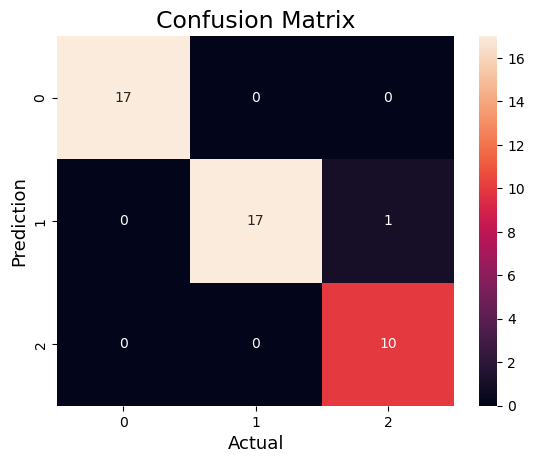

In [30]:
# More Good Visaulization
sns.heatmap(mat, annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

<ul><li style="font-size: 24px; font-weight: bold">Saving The Model</li></ul>

In [32]:
from joblib import dump, load 

In [33]:
dump(model, "model.joblib")

['model.joblib']